In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning

     |████████████████████████████████| 6.4 MB 4.0 MB/s 
     |████████████████████████████████| 17.9 MB 559 kB/s 
     |████████████████████████████████| 237 kB 71.4 MB/s 
     |████████████████████████████████| 200 kB 59.7 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.4 MB 54.3 MB/s 
     |████████████████████████████████| 943 kB 54.8 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 3.6 MB 60.4 MB/s 
     |████████████████████████████████| 112 kB 71.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.33.0-py3-none-any.whl size=11763 sha256=7b20655b4b246c3c40dab4d04123c929fbd370f9961fa4425422e89928476ec9
  Stored in directory: /root/.cache/pip/wheels/d4/60/ef/c49ae113df02818c4ade5fb6e2e89bb928625412eda0bb

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output
quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

In [ ]:
'''
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb)*np.random.rand(num_samples, 1) + lb
y = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)

print(X)
print(y)

plt.plot(X_, f(X_), 'r--')
plt.plot(X, y, 'bo')
plt.show()
'''

"\nnum_samples = 20\neps = 0.2\nlb, ub = -np.pi, np.pi\nX_ = np.linspace(lb, ub, num=50).reshape(50, 1)\nf = lambda x: np.sin(x)\n\nX = (ub - lb)*np.random.rand(num_samples, 1) + lb\ny = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)\n\nprint(X)\nprint(y)\n\nplt.plot(X_, f(X_), 'r--')\nplt.plot(X, y, 'bo')\nplt.show()\n"

In [ ]:
# construct simple feature map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)
print(feature_map)

# construct simple ansatz
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)
print(ansatz)

# construct QNN
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)

   ┌───────┐
q: ┤ Ry(x) ├
   └───────┘
   ┌───────┐
q: ┤ Ry(y) ├
   └───────┘


In [ ]:
# callback function that draws a live plot when the .fit() method is called
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn,
                                   loss='l2',
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph)

In [ ]:
#from IPython.core.debugger import set_trace

In [ ]:
#import sys
'''
sys.path.append("../Qiskit_Dynamic_Modelling")
sys.path.append("./modelQ")
sys.path.append("./dynamicsQ")
'''
sys.path.append("./sample_data")
from dataloader import *
train_data = np.load('/content/sample_data/train_dataset.npz')
train_inputs = train_data["input"]
train_labels = train_data["labels"]
X_inputs = train_inputs[:50000]
y_labels = train_labels[:50000]
#train_dataset = DynamicsDataset(train_inputs, train_labels)
train_dataset = DynamicsDataset(X_inputs, y_labels)

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 collate_fn=DynamicsDataset.collate_fn,
                                                 pin_memory=True,
                                                 num_workers=1)
print(len(X_inputs))
print(len(y_labels))


50000
50000


In [ ]:
from qiskit import transpile, assemble
class QuanvCircuit:
    """ 
    This class defines filter circuit of Quanvolution layer
    """    
    def __init__(self, kernel_size, backend, shots, threshold):
        # --- Circuit definition start ---
        self.n_qubits = kernel_size ** 2
        self._circuit = qiskit.QuantumCircuit(self.n_qubits)
        self.theta = [qiskit.circuit.Parameter('theta{}'.format(i)) for i in range(self.n_qubits)]

        for i in range(self.n_qubits):
            self._circuit.rx(self.theta[i], i)
        
        self._circuit.barrier()
        self._circuit.measure_all()
        # ---- Circuit definition end ----
        self.backend   = backend
        self.shots     = shots
        self.threshold = threshold

    def run(self, data):
        # encoding data to parameters
        thetas = [data]
        
        param_dict = dict()
        for theta in thetas:
            for i in range(self.n_qubits):
                param_dict[self.theta[i]] = theta[i]
        param_binds = [param_dict]

        List = [thetas]
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = param_binds)
        job = self.backend.run(qobj)
        result = job.result().get_counts()

        # decoding the result
        counts = 0
        for key, val in result.items():
            cnt = sum([int(char) for char in key])
            counts += cnt * val
        
        probabilities = counts / (self.shots * self.n_qubits)
        
        return probabilities

In [ ]:
backend = qiskit.Aer.get_backend('qasm_simulator')
filter_size = 2
circ = QuanvCircuit(filter_size, backend, 100, 127)
#data = torch.tensor([[0, 200], [100, 255]])
#data = torch.tensor([-2.8351264, 1.3314428,  -0.18492305,  0.00792312]).numpy()#1,2,3,4]).numpy()
data = [-2.8351264,  1.3314428,  -0.18492305,  0.00792312]

#
print(data)
#print(data.size())
print(circ.run(data))

circ._circuit.draw()#output='mpl')

[-2.8351264, 1.3314428, -0.18492305, 0.00792312]
0.3375


┌────────────┐ ░  ░ ┌─┐         
   q_0: ┤ Rx(theta0) ├─░──░─┤M├─────────
        ├────────────┤ ░  ░ └╥┘┌─┐      
   q_1: ┤ Rx(theta1) ├─░──░──╫─┤M├──────
        ├────────────┤ ░  ░  ║ └╥┘┌─┐   
   q_2: ┤ Rx(theta2) ├─░──░──╫──╫─┤M├───
        ├────────────┤ ░  ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Rx(theta3) ├─░──░──╫──╫──╫─┤M├
        └────────────┘ ░  ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════╩══╩══╩══╩═
                             0  1  2  3

In [ ]:
import qiskit
backend = qiskit.Aer.get_backend('qasm_simulator')
filter_size = 2
circ = QuanvCircuit(filter_size, backend, 100, 127)

In [ ]:
#for (X_train, y_train) in train_dataloader:
print('Loading Training data')
xVal = []
yVal = []
#count = 0
for (X_train, y_train) in train_dataloader:
    #print('Training Starts')
    #print(X_train.detach().numpy()[0])
    #print(y_train.detach().numpy()[0])
    x = circ.run(X_train.detach().numpy()[0])
    y = circ.run(y_train.detach().numpy()[0])
    #regressor.fit(x, y)
    
    xVal.append([x])
    yVal.append(y)
    '''
    count += 1
    
    if (count == 50000):
        print('Loaded data :',count)
        break
    '''
print('x data',len(xVal))
print('y data',len(yVal))


Loading Training data


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


x data 50000
y data 50000


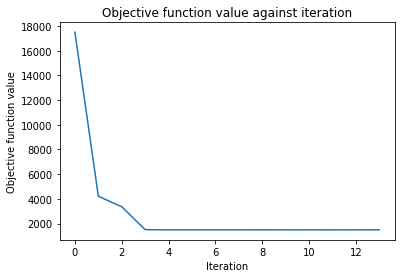

Total Training Time : 7051.831350326538


In [12]:
#print(torch.tensor(xVal).detach().numpy())
#print(torch.tensor(yVal).detach().numpy())
import time
print('Training Started')
startTime = time.time()
regressor.fit(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())
print('Total Training Time :', (time.time()-startTime))

In [13]:
# create empty array for callback to store evaluations of the objective function
'''
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
#set_trace()

#import pdb; pdb.set_trace()
#regressor.fit(X, y)
regressor.fit([1], 1)
'''
# return to default figsize
#plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())


-1.0083991836847592

In [14]:
print(objective_func_vals)

[17497.53775066666, 4211.549464196395, 3357.536011807917, 1503.9061848238787, 1483.5268802255184, 1484.4908214588766, 1484.2207121472027, 1484.0932874567195, 1491.3789444947095, 1482.8597319869539, 1484.92946745298, 1481.9600680875417, 1486.2004153809164, 1491.457017724896]
